# Code Along (structure): 1 Sample t-test

## 1. Defining the problem

In [1]:
from scipy import stats
import numpy as np
import pandas as pd

In [2]:
# The Null Hypothesis (H0): mean(population) = 1
# The Alternative Hypothesis (H1 or HA): mean(population) != 1.

# (If you're wondering why we don't test for just mean < 1: having overweight squirrels is totally possible,
# and we had to decide which test to use (1-tailed or 2-tailed) before taking the sample.)


# here's the sample we took:
squirrels = pd.Series([1.3, 0.47, 1.5, 1.66, 2.43, 1.29, 0.94, 1.06, 1.03, 0.76, 0.6, 0.76, 0.32, 2.2, 1.24, 1.8, 1.66, 0.51, 
                       0.72, 1.62, 0.7, 0.76, 0.9, 0.93, 0.98, 0.42, 0.59, 0.12, 0.95, 0.55, 0.16, 1.25, 0.42, 0.64, 0.66, 
                       1.04, 0.49,0.41, 0.4, 0.81, 0.71, 0.04, 0.6, 2.44, 1.61, 0.13, 2.08, 0.7, 0.61, 0.58, 0.77, 0.67, 1.16, 
                       0.31, 0.3, 0.66, 0.03, 0.54, 0.63, 1.03, 0.73, 2.02])



In [3]:
samp_size = len(squirrels)
samp_size

62

In [4]:
# Zoological registers say that squirrels in that area weight on average 1kg
# The mean of our sample, however, is:
squirrels_mean = squirrels.mean()
squirrels_mean

0.8935483870967743

In [5]:
# Your sample has quite a large standard deviation.
# Do you think that has an impact?
np.std(squirrels)

0.5698474520662796

## 2. Hypothesis test (manual approach)

Are squirrels starving? :(

In [6]:
# Is the mean of our sample smaller than 1kg due to chance (H0), or because the population
# of squirrels from where the sample comes has, in fact, a different mean than 1kg (H1)?

# The Standard Error of the Mean will tell us how far should we expect the mean of our sample to be 
# from the true mean of the population. Let's compute it:

standard_error=np.std(squirrels)/np.sqrt(samp_size)

# Read more about the Standard Error of the Mean in page 171 of OpenIntro Statistics.
standard_error

0.07237069878315248

In [26]:
#Standard error using scipy
sem_squirrels = stats.sem(squirrels)
sem_squirrels

0.07296148980027695

We can build a 99% confidence interval by looking at 3 SEMs above and below our sample mean:

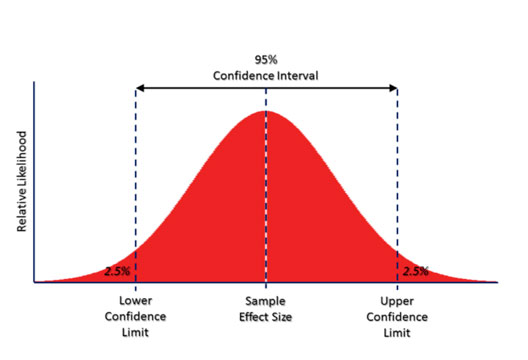

In [8]:
squirrels_mean + 3 * stats.sem(squirrels, ddof=1)

1.1124328564976051

In [9]:
squirrels_mean - 3 * stats.sem(squirrels, ddof=1)

0.6746639176959435

In [10]:
# That already answers the question: Are squirrels starving?

# We can rephrase this question in mathematical terms:
# What's the probability that the mean of our sample (0.89) comes from a population with mean = 1?
# Or, in other words: is there a statistically significant difference between the mean of our sample 
# and the reference of 1kg?

# We test a difference between 1 sample and 1 single value with a 1-sample t-test.
# We can do the t-test with a single python function: scipy.stats.ttest_1samp. 
# But first, let's unfold the underlying process.

# The Central Limit Theorem tells us that no matter the true underlying distribution of the population,
# if we take multiple samples of a fixed size and we plot the means of these samples, they will form a 
# normal distribution. This distribution is called the "Sample distribution of the sample means".

# The "Sample distribution of the sample mean" has these 3 properties:
    # 1) its mean is equal to the mean of the population (we're assuming it's 1)
    # 2) its standard deviation is equal to the standard error of our estimate (we computed it above)
    # 3) it resembles a normal distribution.

In [11]:
# Simulate the "Sample distribution of the sample means"
# normal
# mean = 1
# std = sem_squirrels

In [12]:
sampl_dist_sampl_means = np.random.normal(loc = 1, # mean
                                          scale = sem_squirrels, #std
                                          size = 1000000
                                         )

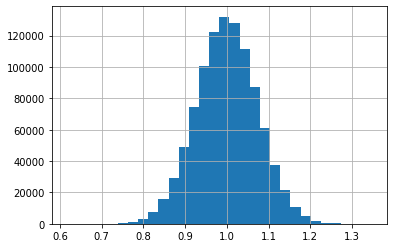

In [13]:
sampl_dist_sampl_means = pd.Series(sampl_dist_sampl_means)
sampl_dist_sampl_means.hist(bins=30);

The **z score** is the number of standard deviations that a number is away from the mean of a normal distribution.

Let's find the z score for our sample.

In [27]:
len(sampl_dist_sampl_means)

1000000

In [29]:
#(total mean - sample mean) / standard error
z_score = (1 - squirrels_mean) / sem_squirrels
z_score

1.459010954883512

Our z score is `1.46`. To find the p value for that score, we can use the cumulative distribution function for the normal distribution. We'll have to double that value, since we want to look at both extremes of the distribution.

In [15]:
# confidence level = 0.99
# alpha = 1 - confidence level = 0.01
# reject the null with p < 0.01
stats.norm.cdf(x = -z_score)*2

0.14456209255263464

We can also look for the p-value in a t distribution with a n-1 degrees of freedom. The difference is neglegible.

In [16]:
stats.t.cdf(-z_score, df = 62-1)*2

0.14969253082162412

## 3. Hypothesis test (using scipy)

Above, we manually performed a z test, which is almost identical to a t test for big samples. Read more about the t-distribution here: https://en.wikipedia.org/wiki/Student%27s_t-distribution

In [17]:
from scipy.stats import ttest_1samp

In [18]:
tscore, pvalue = ttest_1samp(a = squirrels, popmean= 1)
pvalue

0.14969253082162412

In [19]:
# pvalue > 0.01 --> fail to reject the null
# we can't be sure that squirrels are starving
# we can't disprove that the mean of the population of squirrels = 1

## 4. Exercise:

Suspecting that WBSCS are smarter than the general population, you designed an experiment and randomly sampled 45 WBS CODING SCHOOL students, who took an IQ test and their result was 130. The average IQ is 100. Test whether or not WBSCS students are different from the regular population.

In [20]:
# What are the null and alternative hypothesis?

# What would you choose as your confidence level if you were in charge of designing this experiment?

In [21]:
wbs_students = [172, 155, 144, 112, 79, 132, 126, 184, 145, 155, 65, 73, 
 56, 156, 117, 213, 143, 86, 86, 197, 54, 195, 186, 108, 
 76, 191, 54, 115, 106, 173, 91, 95, 144, 94, 135, 116, 
 182, 144, 127, 216, 71, 200, 182, 71, 129]

In [31]:
# Find the p-value
# your code here
tscore, pvalue = ttest_1samp(a = wbs_students, popmean= 100)
pvalue


9.338735146790408e-05

In [23]:
0.00009338735 #Rejected hypothesis

9.338735e-05

In [24]:
tscore

4.299872471973726